In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

D:\Program Files (x86)\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
trainPath = os.path.join("train.csv")
testPath = os.path.join("test.csv")
submitPath = os.path.join("sample_submit.csv")
trainData = pd.read_csv(trainPath)
testData = pd.read_csv(testPath)
submitData = pd.read_csv(submitPath)

In [8]:
# 去掉编号一列
trainData.drop("CaseId", axis=1, inplace=True)
testData.drop("CaseId", axis=1, inplace=True)

In [9]:
trainData.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Evaluation
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,2,2,2,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,3,2,3,1,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,4,2,4,1,0,0,1,1,0


In [10]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 37 columns):
Q1            200000 non-null int64
Q2            200000 non-null int64
Q3            200000 non-null int64
Q4            200000 non-null int64
Q5            200000 non-null int64
Q6            200000 non-null int64
Q7            200000 non-null int64
Q8            200000 non-null int64
Q9            200000 non-null int64
Q10           200000 non-null int64
Q11           200000 non-null int64
Q12           200000 non-null int64
Q13           200000 non-null int64
Q14           200000 non-null int64
Q15           200000 non-null int64
Q16           200000 non-null int64
Q17           200000 non-null int64
Q18           200000 non-null int64
Q19           200000 non-null int64
Q20           200000 non-null int64
Q21           200000 non-null int64
Q22           200000 non-null int64
Q23           200000 non-null int64
Q24           200000 non-null int64
Q25           200000 non-

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5906757B8>,
      dtype=object)

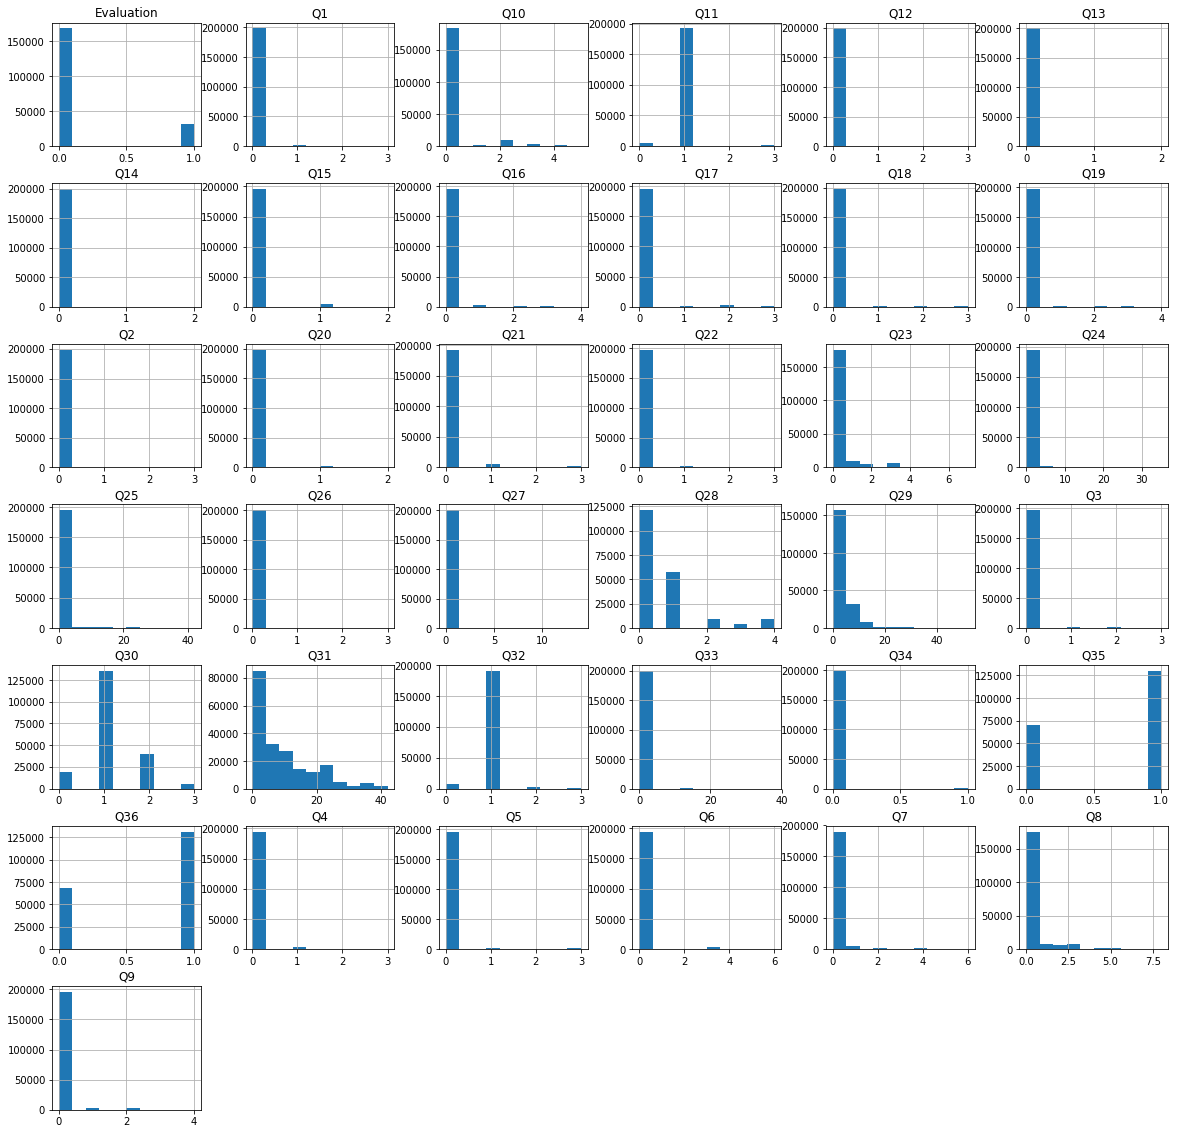

In [11]:
# 绘制直方图，参数 figsize 可指定输出图片的尺寸
trainData.hist(figsize=(20, 20))

In [13]:
# 了解特征之间的相关性，计算相关系数矩阵。然后对某个特征来排序
corr_matrix = trainData.corr()
corr_matrix["Evaluation"].sort_values(ascending=False)

Evaluation    1.000000
Q28           0.410700
Q30           0.324421
Q36           0.302709
Q35           0.224996
Q34           0.152743
Q32           0.049397
Q21           0.034897
Q33           0.032248
Q13           0.023603
Q8            0.021922
Q19           0.019694
Q20           0.013903
Q4            0.011626
Q27           0.004262
Q23           0.002898
Q7            0.001143
Q31          -0.000036
Q14          -0.000669
Q29          -0.002014
Q10          -0.002711
Q12          -0.005287
Q1           -0.006511
Q16          -0.007184
Q18          -0.007643
Q26          -0.008188
Q11          -0.009252
Q24          -0.010891
Q22          -0.011821
Q25          -0.012660
Q6           -0.016072
Q2           -0.018307
Q15          -0.019570
Q9           -0.021261
Q5           -0.023893
Q3           -0.026349
Q17          -0.028461
Name: Evaluation, dtype: float64

In [15]:
# 从训练集分离标签
y = trainData['Evaluation']
# 删除标签一列
trainData.drop("Evaluation",axis=1,inplace=True)

In [16]:
# 导入KMeans包
from sklearn.cluster import KMeans
est = KMeans(n_clusters=2, init="k-means++", n_jobs=-1)
est.fit(trainData, y)
y_pred = est.predict(testData)

In [17]:
submitData['Evaluation'] = y_pred
submitData.to_csv("submit_data.csv", index=False)

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv("sample_submit.csv")

train.drop('CaseId', axis=1, inplace=True)
test.drop('CaseId', axis=1, inplace=True)

y_train = train.pop('Evaluation')

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(train, y_train)
y_pred = clf.predict_proba(test)[:, 1]

submit['Evaluation'] = y_pred
submit.to_csv('my_RF_prediction.csv',index=False)